In [1]:
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from classifier.AdalineSGD import AdalineSGD
from shared import Plot, Data

In [2]:
# Get Iris data
print('Download Iris data...')
iris = Data.get_iris_data()
print(iris.tail())
print('Finished!')

Download Iris data...
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica
Finished!


In [3]:
# Get training data
y = iris.iloc[0:100, 4].values  # Get species
y = np.where(y == 'Iris-setosa', -1, 1)  # Iris-setosa : -1, else : 1
X = iris.iloc[0:100, [0, 2]].values  # Get sepal length & peral length


Plot data...


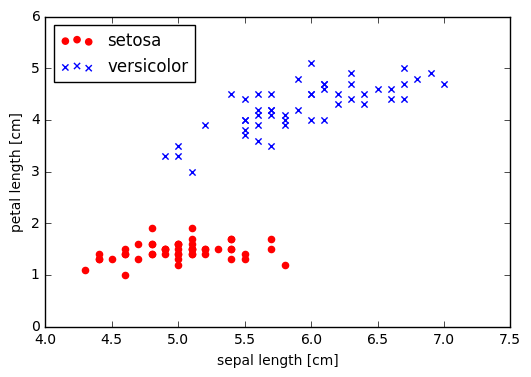

In [4]:
# Plot data
print('\nPlot data...')
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o',
            label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x',
            label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [5]:
# Standardized
"""
Standardized, make features satisfing stand normal distribution
    (mean = 0, standard deviation = 1)

xj' = (xj - mean(xj))/(standatd_deviation(xj))
"""
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()


Plot results...


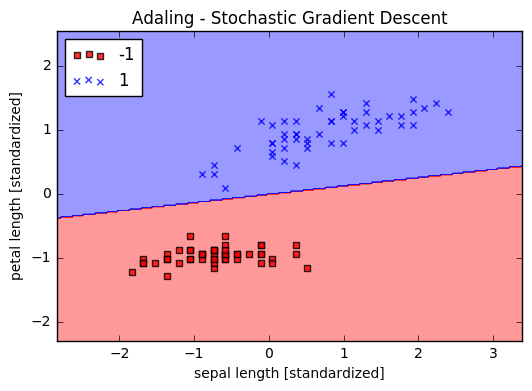

In [6]:
# Plot results
print('\nPlot results...')
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
Plot.plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaling - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()


Plot errors...


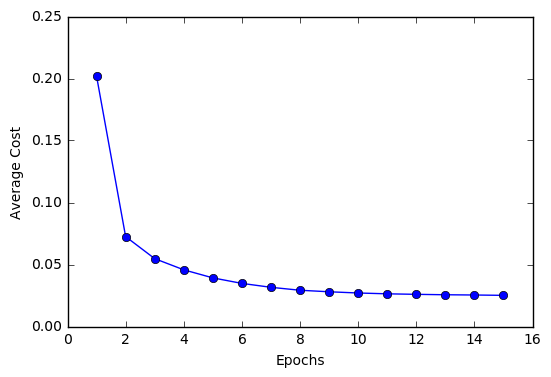

In [7]:
# Plot errors
print('\nPlot errors...')
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()